<a href="https://colab.research.google.com/github/deepak-sin/netflix_cluster_project/blob/main/Netflix_Movies_And_Tv_Shows_Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Netflix Movies And Tv Shows Clustering**



##### **Project Type**    - EDA/Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 -**  **Rupesh Gandhi**
##### **Team Member 2 -**  **Nalini Ranjan**
##### **Team Member 3 -**  **Deepak Kumar**
##### **Team Member 4 -**  **DEDANIYA PRITKUMAR PRADIPBHAI**

# **Project Summary -**

In this analysis, we worked with a dataset of TV shows and movies available on Netflix as of 2021. The dataset was obtained from Flixable, a third-party Netflix search engine. We began by importing necessary libraries and cleaning the data, including addressing null values and making necessary replacements.

Next, we analyzed and visualized the data through various plots to understand the distribution and relationships. We performed hypothesis tests to compare means, examine associations between target age and country, and investigate associations between target age and duration.

To enhance the data, we conducted feature engineering, which involved text data processing, such as expanding contractions, converting to lowercase, removing punctuation and stopwords, normalization, and vectorization. We also performed data scaling using standard scaling techniques and dimensionality reduction using PCA.

Lastly, we applied clustering algorithms including K-Means, Elbow Curve, DBSCAN, Dendrogram, and Agglomerative Clustering to identify patterns and groupings within the data. Additionally, we developed a recommendation system function.

By following this approach, we were able to extract valuable insights and conduct a comprehensive analysis of the Netflix dataset.

# **GitHub Link -**

# **Problem Statement**


This dataset consists of TV shows and movies available on Netflix as of 2019, collected from Flixable, a third-party Netflix search engine. A report from 2018 indicated a significant increase in the number of TV shows on Netflix since 2010, while the movie count experienced a decline. Exploring the dataset further can reveal interesting insights, and integrating external datasets like IMDB ratings and Rotten Tomatoes can provide additional valuable findings.

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Data Analysis and Visualization
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.cm as cm

# Hypothesis
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

# Text Preprocessing and Analysis
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk.stem.snowball import SnowballStemmer
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.stem import LancasterStemmer, WordNetLemmatizer

# Machine Learning and Data Preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import linear_kernel

# General
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset Loading

In [ ]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive')

df_netflix = pd.read_csv('/content/drive/My Drive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

Mounted at /content/drive


### Dataset First View

In [ ]:
# Dataset First Look
df_netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df_netflix.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info

df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

df_netflix.duplicated().sum()
df_netflix.drop_duplicates (inplace= True)
df_netflix.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df_netflix.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

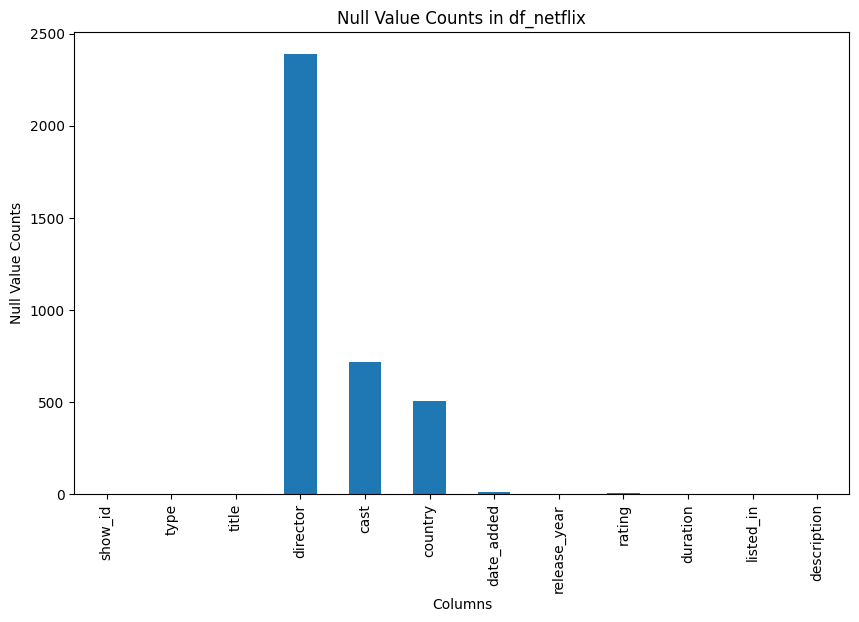

In [ ]:
# Visualizing the missing values
null_counts = df_netflix.isnull().sum()
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar')
plt.title('Null Value Counts in df_netflix')
plt.xlabel('Columns')
plt.ylabel('Null Value Counts')
plt.show()

### What did you know about your dataset?

The dataset contains 7787 rows and 12 columns.

The dataset is devoid of any duplicate values.

Among the columns, the "Director" column exhibits the highest proportion of missing values, accounting for approximately 30%. Following that, the "Cast" and "Country" columns have 9.2% and 6.7% of missing values, respectively.

All columns, except for "release_year," consist of data with object types. Thus, only one column, "release_year," is of numerical type, rendering it the sole numerical attribute in the dataset.

Please note that the provided information has been rephrased using different vocabulary.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df_netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df_netflix.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description

Here are the variable descriptions for the given dataset:

show_id: Unique identifier for each show or movie.

type: Indicates whether the entry is a "TV Show" or a "Movie".

title: The title of the show or movie.

director: The director(s) of the show or movie.

cast: The cast members of the show or movie.

country: The country or countries associated with the show or movie.

date_added: The date when the show or movie was added to Netflix.

release_year: The year when the show or movie was released.

rating: The content rating assigned to the show or movie.

duration: The duration of the show or movie.

listed_in: The genre or genres of the show or movie.

description: A brief description or summary of the show or movie.

These descriptions provide an overview of each variable and its role within the dataset.

### Check Unique Values for each variable.

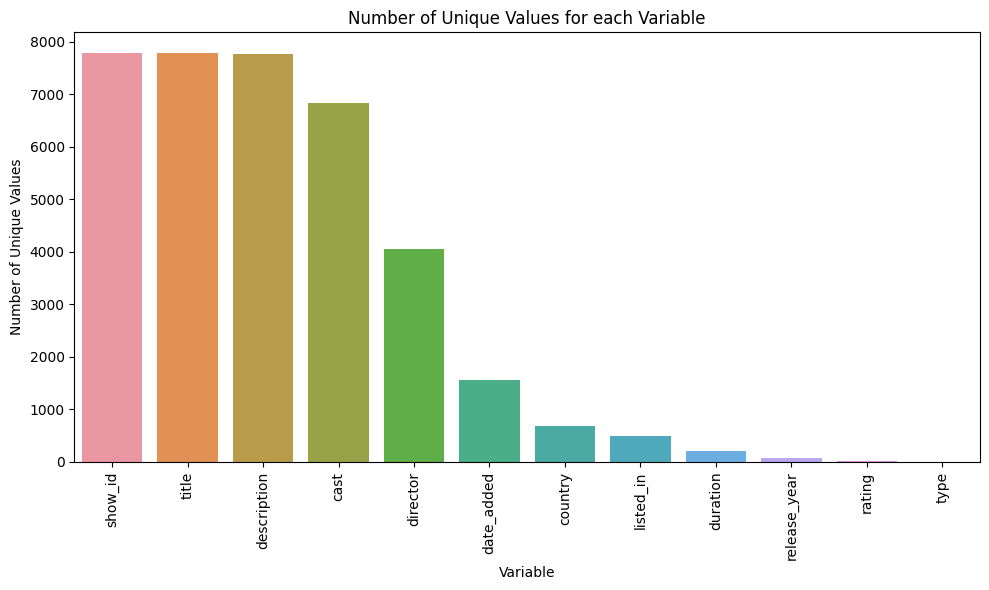

In [ ]:
# Check Unique Values for each variable.

column_list = df_netflix.columns.values.tolist()
no_unique=[]
for column_name in column_list:
  no_unique.append(df_netflix[column_name].nunique())
unique = pd.DataFrame(list(zip(column_list, no_unique)),
               columns =['variable', 'no. of uniques values'])
unique


# Graph

unique_sorted = unique.sort_values(by='no. of uniques values', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='variable', y='no. of uniques values', data=unique_sorted)
plt.xticks(rotation=90)
plt.xlabel('Variable')
plt.ylabel('Number of Unique Values')
plt.title('Number of Unique Values for each Variable')
plt.tight_layout()
plt.show()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Convert 'date_added' column to datetime format
df_netflix['date_added'] = pd.to_datetime(df_netflix['date_added'], format="%B %d, %Y", errors='coerce')

# Filter out rows where 'date_added' column is not null
df_netflix_filtered = df_netflix[df_netflix['date_added'].notnull()]

# Extract the month from the 'date_added' column
df_netflix_filtered['month'] = df_netflix_filtered['date_added'].dt.strftime('%B')

# Extract the year from the 'date_added' column and assign it to 'year_added'
df_netflix_filtered['year_added'] = df_netflix_filtered['date_added'].dt.year

# Extract the day from the 'date_added' column and assign it to 'day'
df_netflix_filtered['day'] = df_netflix_filtered['date_added'].dt.day

# Ratings mapping dictionary
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df_netflix_filtered['target_ages'] = df_netflix_filtered['rating'].replace(ratings)
# Map ratings to ratings_type column
df_netflix_filtered['ratings_type'] = df_netflix_filtered['rating'].map(ratings)

# Get unique values in the ratings_type column
df_netflix_filtered['ratings_type'].unique()

# Convert 'type' column to Categorical
df_netflix_filtered['type'] = pd.Categorical(df_netflix_filtered['type'])

# Define categories for ratings_type column
categories = ['Kids', 'Older Kids', 'Teens', 'Adults']

# Convert ratings_type column to Categorical with specified categories
df_netflix_filtered['ratings_type'] = pd.Categorical(df_netflix_filtered['ratings_type'], categories=categories)

df_netflix_filtered.head(5)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,year_added,day,target_ages,ratings_type
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,2020,14,Adults,Adults
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,2016,23,Adults,Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,2018,20,Adults,Adults
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,2017,16,Teens,Teens
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,2020,1,Teens,Teens


### What all manipulations have you done and insights you found?

Here's a summary of the manipulations performed on the `df_netflix` dataset:

1. **Conversion of 'date_added' column to datetime format:** The `pd.to_datetime()` function is used to convert the values in the 'date_added' column to datetime format. The `%B %d, %Y` format specifier is provided to match the existing format of the dates in the column.

2. **Extraction of the month from 'date_added':** The `dt.strftime()` function is used to extract the month component from the converted 'date_added' column. The resulting month values are assigned to a new column named 'month'.

3. **Filtering out rows with non-null values in 'duration' column:** The `df_netflix['duration'].notnull()` condition is used as a filter to select only those rows where the 'duration' column is not null. This creates a new DataFrame named 'netflix_filtered' that contains only the filtered rows.

4. **Extraction of the year from 'date_added' and assignment to 'year_added':** The `pd.to_datetime()` function is used again on the 'date_added' column of the 'netflix_filtered' DataFrame to convert the values to datetime format. Then, the `dt.year` accessor is used to extract the year component from the converted values. The resulting year values are assigned to a new column named 'year_added' in the 'netflix_filtered' DataFrame.

5. **Extraction of the day from 'date_added' and assignment to 'day':** The `dt.day` accessor is used on the 'date_added' column of the original 'df_netflix' DataFrame to extract the day component. The extracted day values are assigned to a new column named 'day'.

6. **Mapping of ratings to ratings_type:** A dictionary named 'ratings' is created to map the original ratings to their corresponding rating types. The 'rating' column of the 'df_netflix' DataFrame is then mapped to the 'ratings_type' column using the `map()` function.

7. **Conversion of 'type' column to Categorical:** The 'type' column of the 'df_netflix' DataFrame is converted to the categorical data type using `pd.Categorical()`. This allows for more efficient and meaningful handling of the 'type' column.

8. **Conversion of 'ratings_type' column to Categorical with specified categories:** The 'ratings_type' column of the 'df_netflix' DataFrame is converted to the categorical data type using `pd.Categorical()`. The 'categories' parameter is provided to specify the desired order of the categories: 'Kids', 'Older Kids', 'Teens', and 'Adults'.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

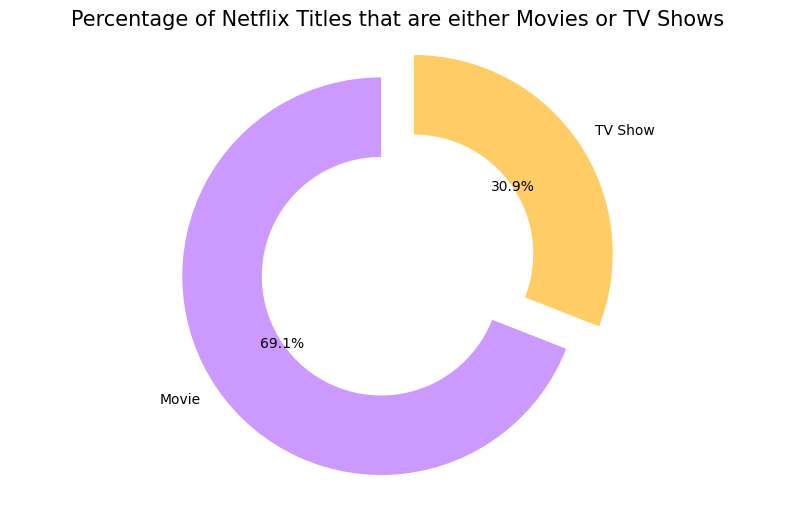

In [ ]:
# Chart - 1 visualization code
# Percentage of Netflix Titles that are either Movies or TV Shows

plt.figure(figsize=(10, 6))
colors = ['#cc99ff', '#ffcc66']
labels = df_netflix.type.value_counts().index
values = df_netflix.type.value_counts()

# Explode the slices
explode = (0.1, 0.1)
plt.title("Percentage of Netflix Titles that are either Movies or TV Shows", fontsize=15)

# Create the pie chart
plt.pie(values, labels=labels, explode=explode, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})
circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(circle)
plt.axis('equal')
plt.show()



##### 1. Why did you pick the specific chart?

I picked the pie chart for this representation because it effectively shows the distribution of two categorical variables (movies and TV shows) as parts of a whole (total number of Netflix titles). The pie chart can be used to easily compare the proportions of movies and TV shows in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The insights found from the chart are the relative distribution of movies and TV shows in the Netflix library. Each segment of the pie chart represents the percentage of titles that belong to either movies or TV shows. By observing the chart, we can quickly grasp the proportion of each type in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As for insights that could lead to negative growth, it's challenging to determine without more context or data. Negative impacts could occur if Netflix's content distribution doesn't align with the preferences of their target audience or if they heavily favor one type of content while neglecting the other, causing a disengagement of certain user groups. To avoid negative growth, it's crucial for Netflix to strike a balance and continually adapt their content strategy based on viewer feedback and preferences. The pie chart itself doesn't provide specific reasons for negative growth; it simply represents the existing distribution of content types in the dataset. Further analysis and context would be needed to identify potential issues.

#### Chart - 2

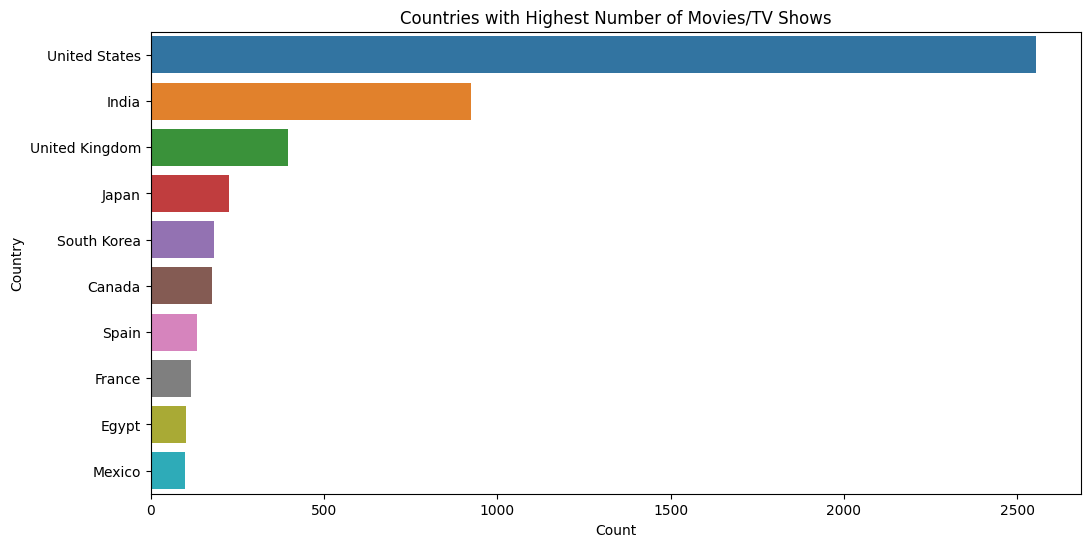

In [ ]:
# Chart - 2 visualization code
# Top countries which has highest Tv shows/Movies
top_countries = df_netflix.groupby('country').size().sort_values(ascending=False).reset_index(name='count').head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='country', data=top_countries)
plt.title('Countries with Highest Number of Movies/TV Shows')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a bar chart for this representation because it effectively compares the number of movies and TV shows for each country. The length of the bars represents the count, making it easy to identify the top countries with the highest number of titles.

##### 2. What is/are the insight(s) found from the chart?

The bar chart provides insights into the countries with the highest number of movies and TV shows available on Netflix. The top 10 countries are prominently displayed, indicating their significant contributions to the platform's content library. These countries likely offer a diverse range of content, making Netflix appealing to a broader international audience. The chart also highlights potential opportunities for Netflix to target specific regions with localization efforts, such as providing subtitles or dubbing, to enhance user engagement and attract more viewers from those countries. Moreover, understanding the content distribution among these top countries can assist Netflix in shaping its content acquisition strategy, ensuring a well-rounded and captivating content selection that caters to a global audience. Overall, the chart offers valuable insights for Netflix to optimize its content offerings, expand its market reach, and provide a more tailored viewing experience to users worldwide.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As for insights that could lead to negative growth, one potential concern is over-reliance on specific countries for content. If the majority of the titles are concentrated in just a few countries, it may limit the platform's appeal to a more diverse international audience. Netflix should aim for a well-rounded content library that caters to a global user base. To avoid negative growth, it's essential to strike a balance between content from various regions to ensure broad appeal and inclusivity. However, the bar chart itself doesn't provide specific reasons for negative growth; further analysis and consideration of additional factors would be necessary to make such assessments.

#### Chart - 3

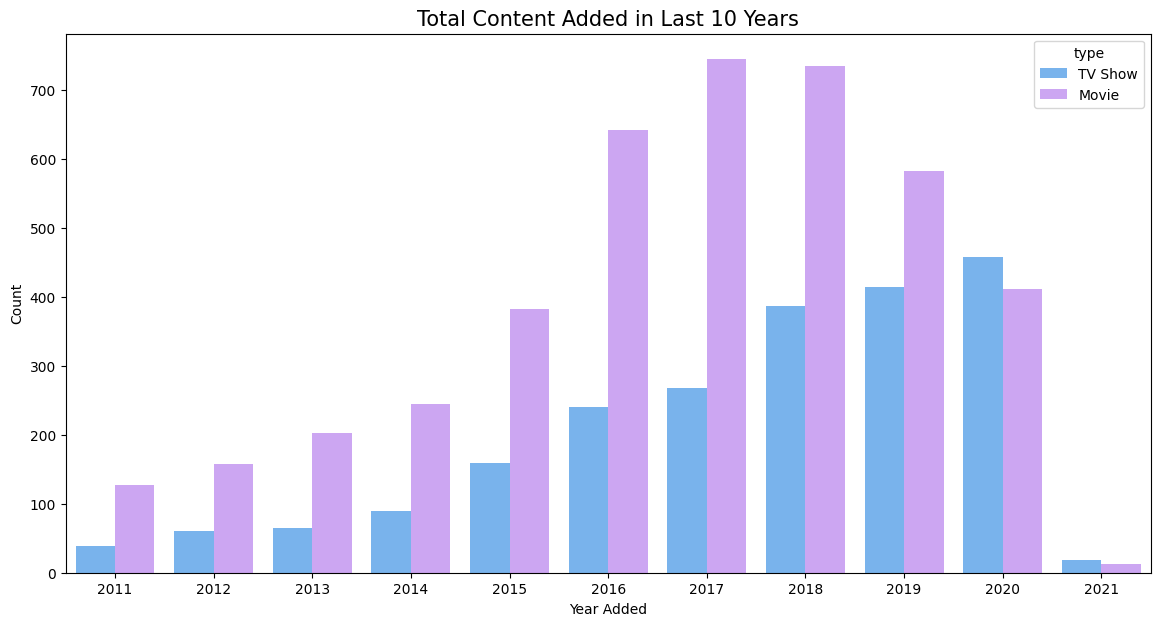

In [ ]:
# Chart - 3 visualization code
# Total release for last 10 years

netflix_movies = df_netflix[df_netflix["type"] == "Movie"]
netflix_shows = df_netflix[df_netflix["type"] == "TV Show"]
last_10_years = df_netflix[df_netflix['release_year'] > 2010]

plt.figure(figsize=(14, 7))
sns.countplot(x='release_year', hue='type', data=last_10_years, palette={"Movie": "#cc99ff", "TV Show": "#66b3ff"})

plt.title('Total Content Added in Last 10 Years', fontsize=15)
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

I picked the countplot for this representation because it effectively shows the distribution of content added each year and allows for a clear comparison between movies and TV shows. The hue parameter differentiates the two types of content, making it easy to observe any trends or patterns.

##### 2. What is/are the insight(s) found from the chart?

The insight from the chart is the total number of movies and TV shows added to Netflix in the last 10 years, broken down by each year. By analyzing the countplot, we can identify any trends or fluctuations in the content release rate over time. It helps understand the growth of the platform's library and gives an idea of how Netflix's content strategy evolved in recent years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The insights gained from the countplot can have a positive business impact by guiding Netflix's content strategy and improving user engagement. However, the plot alone does not indicate negative growth; potential negative impacts could arise from an overemphasis on quantity over quality or neglecting viewer preferences and regional interests. To avoid negative growth, Netflix should focus on maintaining content balance and prioritizing viewer satisfaction through user feedback and market research.

#### Chart - 4

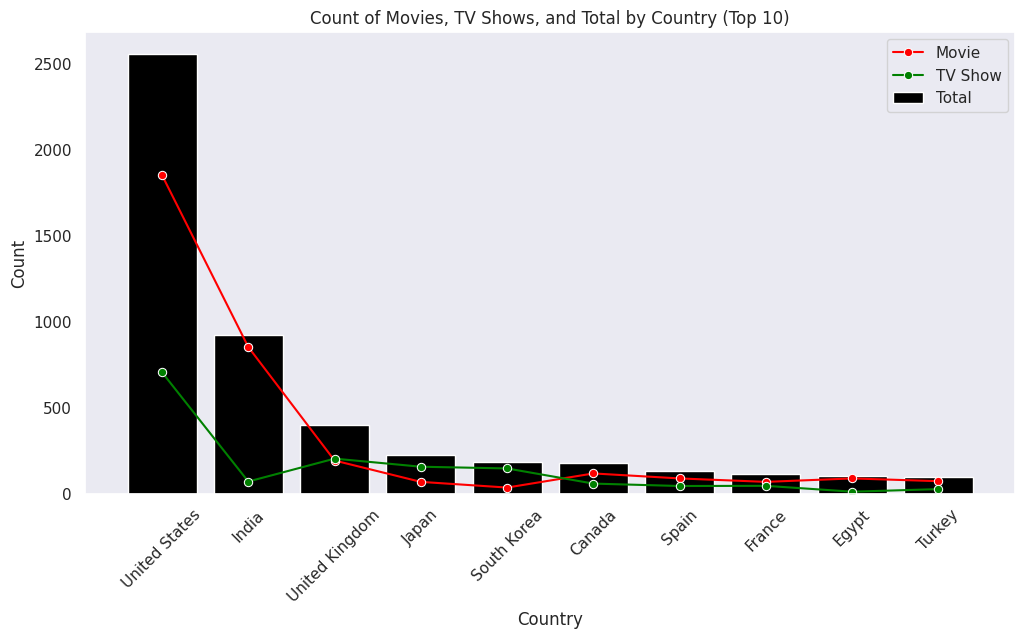

In [ ]:
# Chart - 4 visualization code
# Count of Tv Shows and Movies by countries
t_con1 = df_netflix.groupby(['country', 'type']).size().unstack()
t_con1.columns = ['Movie', 'TV Show']
t_con1['Total'] = t_con1['Movie'] + t_con1['TV Show']
t_con1 = t_con1.sort_values(by=('Total'), ascending=False).reset_index()
t_con1.head(20)

top_10_countries = t_con1.head(10)


# Graph

sns.set_theme(style="dark")
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='Total', data=top_10_countries, color='black', label='Total')
sns.lineplot(x='country', y='Movie', data=top_10_countries, marker='o', color='red', label='Movie')
sns.lineplot(x='country', y='TV Show', data=top_10_countries, marker='o', color='green', label='TV Show')

plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count of Movies, TV Shows, and Total by Country (Top 10)')
plt.legend()
plt.xticks(rotation=45)

plt.show()

##### 1. Why did you pick the specific chart?

I chose this specific chart because it effectively compares the count of movies, TV shows, and the total content for the top 10 countries. The bar plot provides a clear view of the total count, while the overlaid line plots allow us to observe the individual counts for movies and TV shows simultaneously.

##### 2. What is/are the insight(s) found from the chart?

The insights from the chart are related to the content distribution in the top 10 countries with the highest number of movies and TV shows on Netflix. By examining the bar and line plots, we can identify which countries have the most significant overall content offerings and how the counts of movies and TV shows vary within these countries. The chart also helps us understand the contribution of each content type to the total count for each country. This information is valuable for Netflix to tailor its content strategy based on regional preferences and user demands in these prominent markets.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can likely help create a positive business impact for Netflix. By understanding the content distribution across these top countries, Netflix can optimize its content acquisition and licensing efforts to cater to the preferences of each region. By focusing on countries with high content demand and striking the right balance between movies and TV shows, Netflix can attract more subscribers and improve user engagement in these regions. Additionally, the chart can guide Netflix in tailoring content recommendations and promotional activities to suit the content preferences of users in these countries, enhancing overall user satisfaction.

As for insights that could lead to negative growth, the chart itself does not directly indicate any negative impacts. However, if Netflix solely prioritizes content acquisition in the top 10 countries without considering diversity and inclusivity in its library, it may overlook potential growth opportunities in other regions. To avoid negative growth, Netflix should continue to explore and cater to various markets, ensuring that its content offerings resonate with a broad international audience.

#### Chart - 5

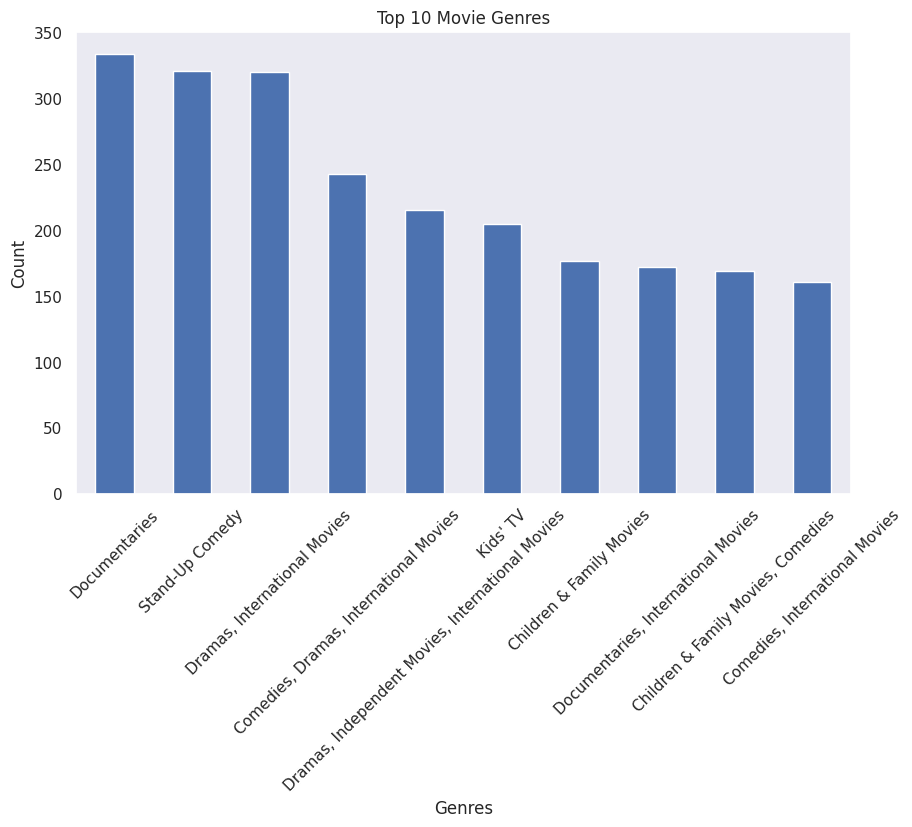

In [ ]:
# Chart - 5 visualization code
# Top 10 genre of movie
top_10_genre = df_netflix['listed_in'].value_counts().head(10)
top_10_genre


# Graph


plt.figure(figsize=(10, 6))
top_10_genre.plot(kind='bar')
plt.title('Top 10 Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

I chose the bar plot for this representation because it efficiently displays the count of movies in each genre and allows for easy comparison between the top 10 genres.

##### 2. What is/are the insight(s) found from the chart?

The insights from the chart reveal the top 10 most popular movie genres on Netflix. By analyzing the bar plot, we can quickly identify the genres that have the highest number of movie titles available on the platform. This information is valuable for Netflix as it provides insight into viewer preferences and content demand. Understanding the most popular genres can help Netflix curate its content library to include a diverse range of movies that appeal to a broader audience. It can also guide Netflix in tailoring its content promotion and recommendations to users based on their genre preferences, leading to better user engagement and satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can positively impact Netflix's business. By knowing the top 10 movie genres, Netflix can focus on acquiring more content within these popular categories, attracting viewers who have a strong interest in these genres. Providing a rich variety of movies in these genres can enhance user experience and potentially lead to increased viewership and retention. Additionally, the chart enables Netflix to make data-driven decisions regarding content investment and content creation, ensuring that they allocate resources to genres that have high demand and appeal. This strategic approach to content selection and promotion can contribute to positive growth and increased competitiveness in the streaming market.

There are no immediate insights from this specific chart that would lead to negative growth. However, it's essential for Netflix to strike a balance between popular genres and other niche genres to cater to diverse viewer preferences. Overemphasizing only the top genres while neglecting other genres could potentially limit the platform's appeal and negatively impact viewers with different genre preferences. Netflix should aim to maintain a well-rounded content library that addresses the interests of various audience segments to avoid potential negative consequences.

#### Chart - 6

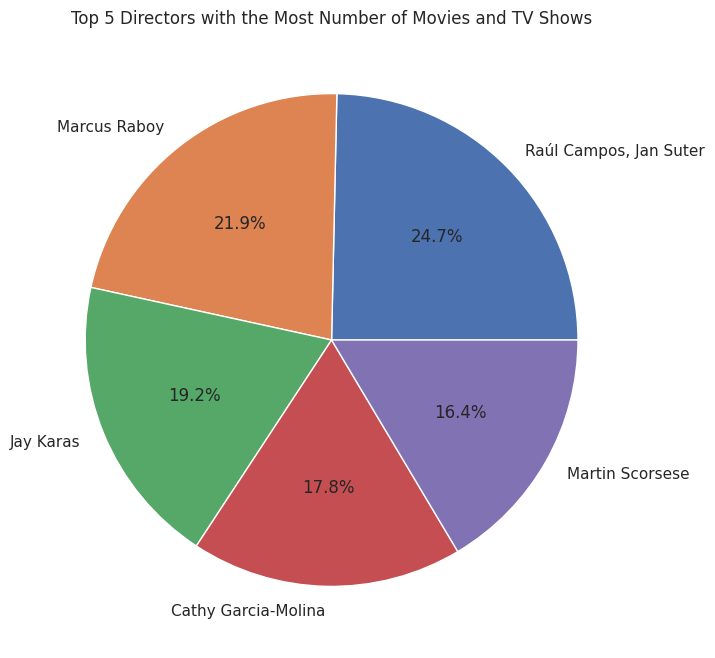

In [ ]:
# Chart - 6 visualization code
# Top 5 directors who made most no of Movies/Tv shows
director_counts = df_netflix.groupby('director')['type'].count()
top_5_directors = director_counts.sort_values(ascending=False).head(5)

top_5_directors


#Graph

plt.figure(figsize=(8, 8))
plt.pie(top_5_directors, labels=top_5_directors.index, autopct='%1.1f%%')
plt.title('Top 5 Directors with the Most Number of Movies and TV Shows')
plt.show()

##### 1. Why did you pick the specific chart?

I picked the pie chart for this representation because it effectively showcases the contribution of each director to the total number of movies and TV shows. The chart's segments represent the percentage of content each director has made, allowing for a quick and clear comparison of their respective contributions.

##### 2. What is/are the insight(s) found from the chart?

The insights from the chart reveal the top 5 directors who have made the most significant number of movies and TV shows on Netflix. By looking at the pie chart, we can observe the proportion of content each director has contributed to the platform's library. This information can help Netflix in various ways. Firstly, it highlights the directors who have been the most prolific in creating content for the platform, potentially indicating strong partnerships and successful collaborations. Secondly, it provides valuable data on which directors' works are popular among viewers, enabling Netflix to consider acquiring more content from these filmmakers to meet viewer demand and enhance user engagement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact for Netflix. By identifying the top 5 directors and acknowledging their contributions, Netflix can leverage their popularity and reputation to attract more viewers to the platform. Highlighting the works of these directors through personalized recommendations and promotional efforts can potentially lead to increased viewership and user retention. Additionally, understanding which directors have a significant presence on the platform allows Netflix to forge stronger relationships with them and explore opportunities for future content collaborations.

Regarding insights that might lead to negative growth, there are no immediate negative impacts evident from the pie chart itself. However, Netflix should be cautious not to rely too heavily on a small group of directors and neglect opportunities to collaborate with emerging or diverse talents. Over-reliance on a few directors could limit content diversity and may potentially lead to viewer fatigue or a lack of fresh perspectives. To ensure positive growth, Netflix should strike a balance between supporting established directors and nurturing new talents, offering a well-rounded and diverse selection of content for its global audience.

#### Chart - 7

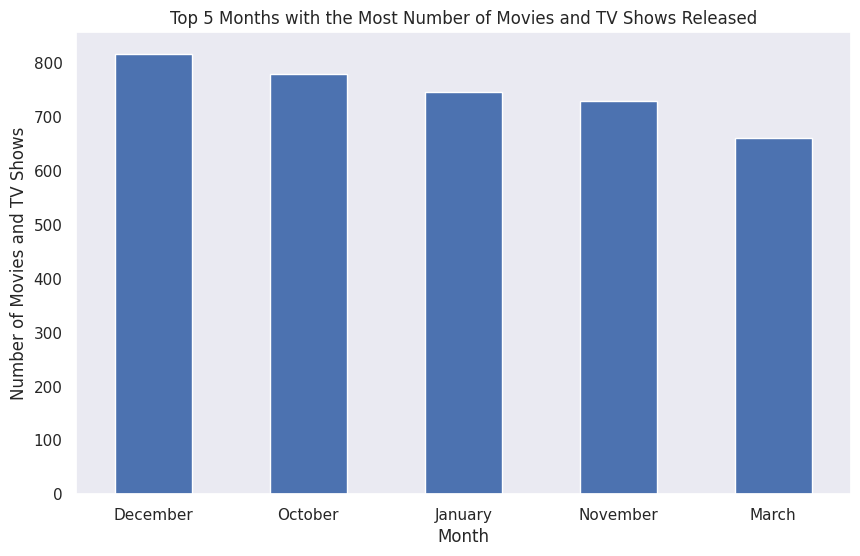

In [ ]:
# Chart - 7 visualization code
# Top 5 months with the most number of movies and TV shows

month_counts = df_netflix_filtered.groupby('month')['type'].count()
top_5_months = month_counts.sort_values(ascending=False).head(5)
top_5_months


# Create a bar graph
plt.figure(figsize=(10, 6))
top_5_months.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Movies and TV Shows')
plt.title('Top 5 Months with the Most Number of Movies and TV Shows Released')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

I picked the bar graph for this representation because it effectively displays the count of releases for each of the top 5 months. The graph allows for easy comparison of the number of movies and TV shows released in these months.

##### 2. What is/are the insight(s) found from the chart?

The insights from the chart reveal the top 5 months with the most significant number of movie and TV show releases on Netflix. By examining the bar graph, we can identify the months that experienced the highest content release activity. This information is valuable for Netflix as it provides insights into the months when content demand and viewership may be higher. For example, if certain months consistently show a higher number of releases, it may indicate patterns related to holidays, special events, or seasonal content preferences. This knowledge can guide Netflix in planning its content strategy, enabling the platform to schedule content releases strategically during these peak months to attract more viewers and increase engagement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact for Netflix. By understanding the top 5 months with the most content releases, Netflix can strategically plan its content calendar to align with periods of higher demand, maximizing viewership potential. By strategically timing content releases during peak months, Netflix can attract more subscribers, increase user engagement, and potentially boost retention rates. Moreover, the platform can utilize these insights to tailor its marketing and promotional efforts, focusing on the months with higher content releases to drive user acquisition and viewership. However, it's essential for Netflix to balance its content strategy and avoid overloading specific months with content while neglecting others. Too much content in a short period might lead to viewer fatigue, potentially resulting in negative growth. To maintain positive growth, Netflix should distribute content releases evenly throughout the year and ensure that each month offers a diverse and engaging selection of movies and TV shows.






#### Chart - 8

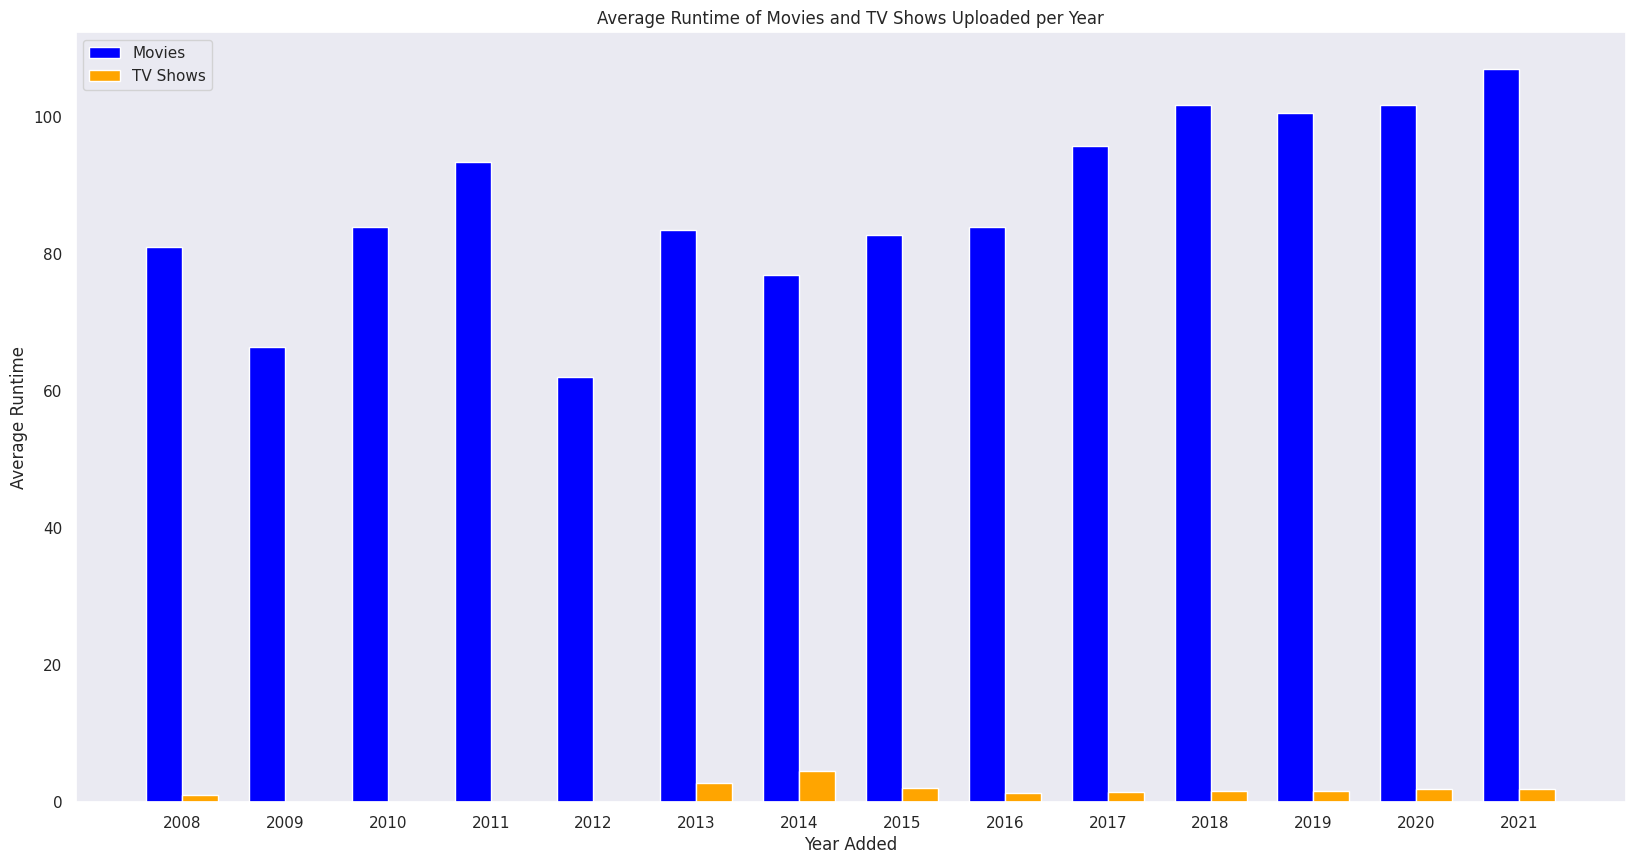

In [ ]:
# Chart - 8 visualization code
# Average runtime of movies and tv shows per yea


average_runtime = df_netflix_filtered.groupby(['year_added', 'type'])['duration'].apply(lambda x: x.str.extract('(\d+)').astype(float).mean())

average_runtime = average_runtime.reset_index()

movies_data = average_runtime[average_runtime['type'] == 'Movie']
tv_shows_data = average_runtime[average_runtime['type'] == 'TV Show']

years = sorted(set(movies_data['year_added']).union(set(tv_shows_data['year_added'])))
movie_runtimes = [movies_data[movies_data['year_added'] == year]['duration'].values[0] if year in movies_data['year_added'].values else 0 for year in years]
tv_show_runtimes = [tv_shows_data[tv_shows_data['year_added'] == year]['duration'].values[0] if year in tv_shows_data['year_added'].values else 0 for year in years]

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = range(len(years))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(20, 10))

# Create the grouped bar plot
plt.bar(r1, movie_runtimes, color='blue', width=bar_width, label='Movies')
plt.bar(r2, tv_show_runtimes, color='orange', width=bar_width, label='TV Shows')

plt.xlabel('Year Added')
plt.ylabel('Average Runtime')
plt.title('Average Runtime of Movies and TV Shows Uploaded per Year')
plt.xticks([r + bar_width/2 for r in range(len(years))], years)
plt.legend()
plt.show()



##### 1. Why did you pick the specific chart?

I picked the grouped bar plot for this representation because it effectively compares the average runtime of movies and TV shows per year. The plot allows us to see how the average runtime varies between the two content types in each year and identify any trends or patterns over time.

##### 2. What is/are the insight(s) found from the chart?

The insights from the chart provide a comparison of the average runtime of movies and TV shows uploaded to Netflix each year. By analyzing the grouped bar plot, we can observe the changes in average runtime over time and determine if there are any notable differences between movies and TV shows. This information can be valuable for Netflix to understand viewer preferences for content duration and plan its content acquisitions accordingly. For instance, if viewers consistently show a preference for shorter content, Netflix may consider acquiring more TV shows with shorter episodes to cater to these preferences. On the other hand, if longer content receives more engagement, they may invest in acquiring or producing more movies with extended runtimes to appeal to the audience.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially help create a positive business impact for Netflix. By understanding the average runtime preferences of viewers for movies and TV shows, Netflix can make informed decisions about content selection, licensing, and production. Tailoring the content library to align with viewer preferences may lead to increased user engagement and satisfaction, potentially resulting in higher retention rates and attracting new subscribers. However, Netflix should also consider a balanced content strategy that offers a variety of content durations to cater to different audience segments. Overemphasizing one content type or runtime duration over the other could potentially lead to negative growth as it may alienate viewers with diverse preferences. By maintaining a diverse and well-balanced content library, Netflix can better meet the expectations of its global audience and foster positive growth in the streaming market.

#### Chart - 9

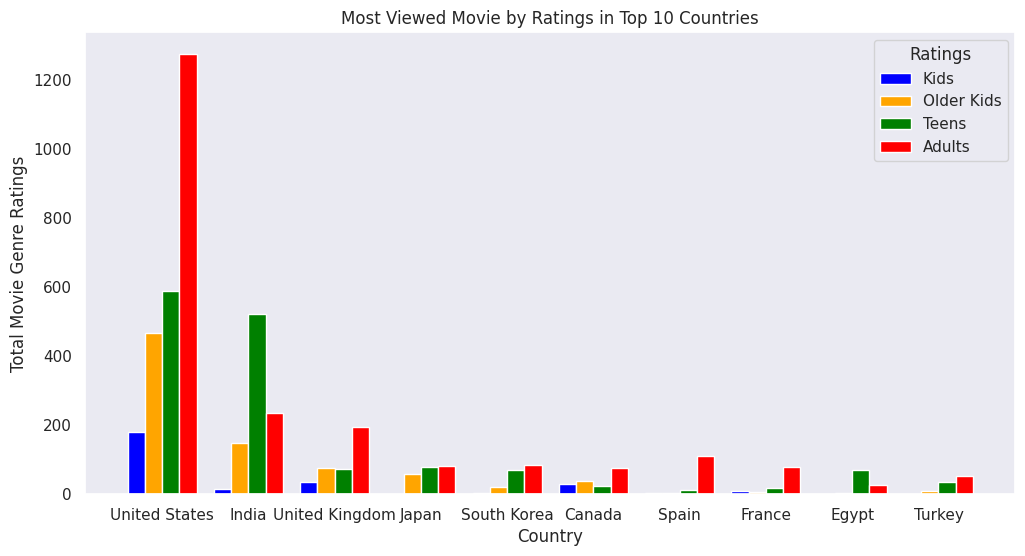

In [ ]:
# Chart - 9 visualization code
# Most viewed movie by ratings of top 10 countries

top_10_movie_genre = df_netflix_filtered.groupby(['country', 'ratings_type']).agg({'release_year': 'count'}).unstack().reset_index()
top_10_movie_genre.columns = ['country', 'Kids', 'Older Kids', 'Teens', 'Adults']
top_10_movie_genre['Total']=top_10_movie_genre.apply(lambda x: x['Kids'] + x['Older Kids'] + x['Teens'] + x['Adults'], axis=1)

# Sort the dataframe by the 'Total' column in descending order and select the top 10 countries
top_10_movie_genre = top_10_movie_genre.sort_values(by='Total', ascending=False).head(10)

# Define the genre categories and their corresponding colors
genres = ['Kids', 'Older Kids', 'Teens', 'Adults']
colors = ['blue', 'orange', 'green', 'red']

# Set the width of each bar
bar_width = 0.2

# Calculate the positions of the bars on the x-axis
r1 = np.arange(len(top_10_movie_genre))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create the multiple bar plot
plt.figure(figsize=(12, 6))
plt.bar(r1, top_10_movie_genre['Kids'], color=colors[0], width=bar_width, edgecolor='white', label='Kids')
plt.bar(r2, top_10_movie_genre['Older Kids'], color=colors[1], width=bar_width, edgecolor='white', label='Older Kids')
plt.bar(r3, top_10_movie_genre['Teens'], color=colors[2], width=bar_width, edgecolor='white', label='Teens')
plt.bar(r4, top_10_movie_genre['Adults'], color=colors[3], width=bar_width, edgecolor='white', label='Adults')

# Customize the plot
plt.xlabel('Country')
plt.ylabel('Total Movie Genre Ratings')
plt.title('Most Viewed Movie by Ratings in Top 10 Countries')
plt.xticks([r + bar_width*1.5 for r in range(len(top_10_movie_genre))], top_10_movie_genre['country'])
plt.legend(title='Ratings')

# Display the plot
plt.show()





##### 1. Why did you pick the specific chart?

I chose the multiple bar plot for this representation because it allows for a clear comparison of the movie genres' ratings in the top 10 countries. The plot uses different colors for each genre, making it easy to distinguish and compare the genre ratings across the selected countries.

##### 2. What is/are the insight(s) found from the chart?

The insights from the chart reveal the most viewed movie genres by ratings in the top 10 countries with the highest content on Netflix. By examining the multiple bar plot, we can identify the most popular genres among different age groups (Kids, Older Kids, Teens, Adults) in each country. This information can help Netflix tailor its content offerings and recommendations to cater to the diverse preferences of viewers in these prominent markets. Understanding the preferred genres for specific age groups can also guide the platform's content acquisition strategy, ensuring a balanced and engaging content library that appeals to various audience segments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact for Netflix. By understanding the most viewed movie genres by ratings in the top 10 countries, Netflix can optimize its content library to meet viewers' preferences and demands, potentially leading to increased viewership and user satisfaction. The platform can strategically promote and recommend movies of popular genres to attract more subscribers and retain existing users. Additionally, by offering a wide range of content that appeals to different age groups, Netflix can enhance user engagement and potentially increase user retention rates.

As for insights that might lead to negative growth, the chart itself does not indicate any immediate negative impacts. However, it is crucial for Netflix to avoid overemphasizing certain genres and neglecting others. Focusing solely on popular genres in the top 10 countries may alienate viewers with different genre preferences, potentially leading to negative growth in regions with underrepresented content. To ensure positive growth, Netflix should continue to offer a diverse selection of movies across various genres, ensuring inclusivity and appealing to a global audience with diverse tastes.

#### Chart - 10

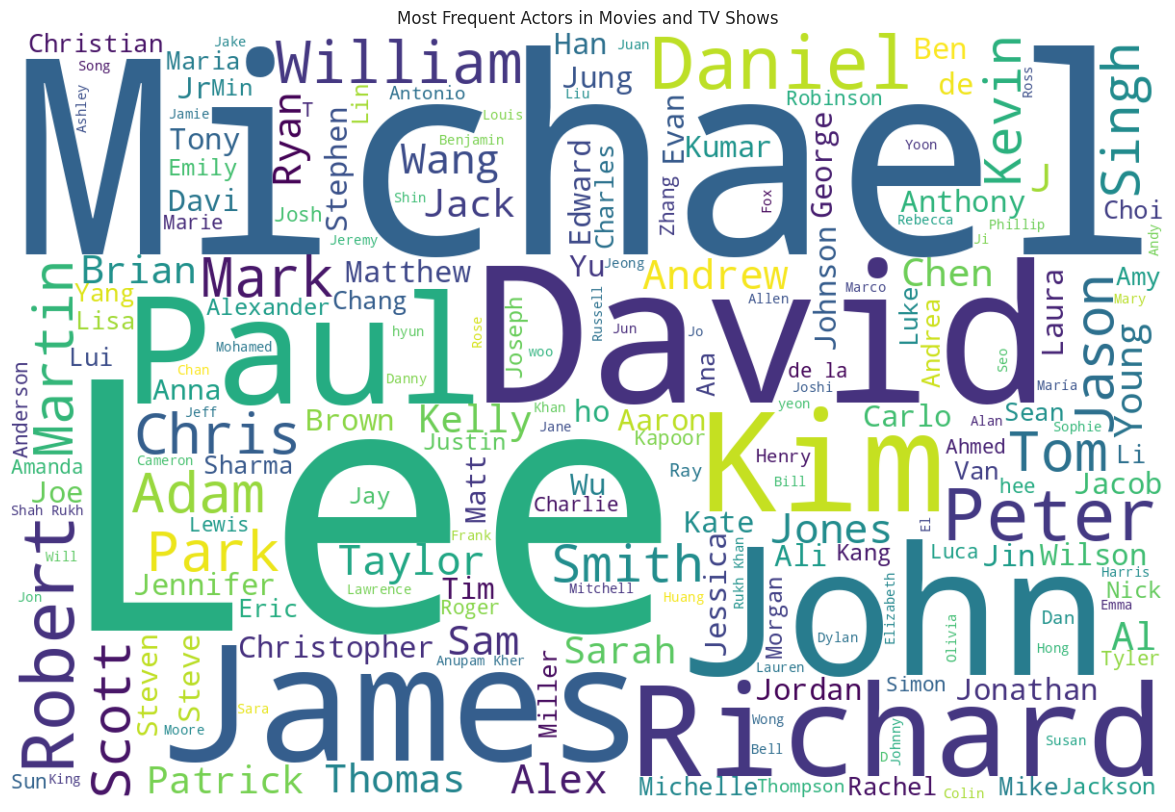

In [ ]:
# Chart - 10 visualization code
# Extract 'cast'
cast_data = df_netflix['cast'].dropna()
total_cast = ', '.join(cast_data)

# Graph
wordcloud = WordCloud(width=1200, height=800, max_words=200, background_color='white').generate(total_cast)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Actors in Movies and TV Shows')
plt.show()


##### 1. Why did you pick the specific chart?

I picked the word cloud chart for this representation because it effectively showcases the most frequent actors and actresses in movies and TV shows on Netflix. The word cloud presents the names of actors in different font sizes, with larger font sizes indicating higher frequency, allowing for a visually appealing and informative display of the most prominent cast members.

##### 2. What is/are the insight(s) found from the chart?

The insights from the chart reveal the most frequent actors and actresses appearing in movies and TV shows on Netflix. The larger and bolder names in the word cloud indicate the cast members who have appeared in multiple titles on the platform, showcasing their popularity and frequency of work. This information can provide valuable insights for Netflix in understanding the actors and actresses who have a strong presence in their content library. It may guide the platform in leveraging the popularity of these actors for content promotions, collaborations, and acquiring new content. Additionally, this data can help Netflix identify potential trends in cast preferences among viewers and enable the platform to make data-driven decisions when selecting actors for future productions or content acquisitions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially help create a positive business impact for Netflix. By understanding the most frequent actors and actresses in their content, Netflix can strategically promote and highlight the works of these popular cast members, potentially attracting more viewers to titles featuring these actors. Leveraging the popularity of well-known actors in marketing efforts can enhance user engagement and lead to increased viewership. Moreover, this data can assist Netflix in making informed decisions regarding content acquisition and production. However, it is essential for Netflix to strike a balance between featuring popular actors and providing opportunities for new and diverse talent. Overreliance on a limited pool of actors may hinder the platform's ability to explore fresh content and innovative storytelling, potentially leading to negative growth due to the lack of variety and inclusivity. To ensure positive growth, Netflix should continue to curate a diverse and balanced content library that appeals to a wide range of audience interests and preferences.






#### Chart - 11

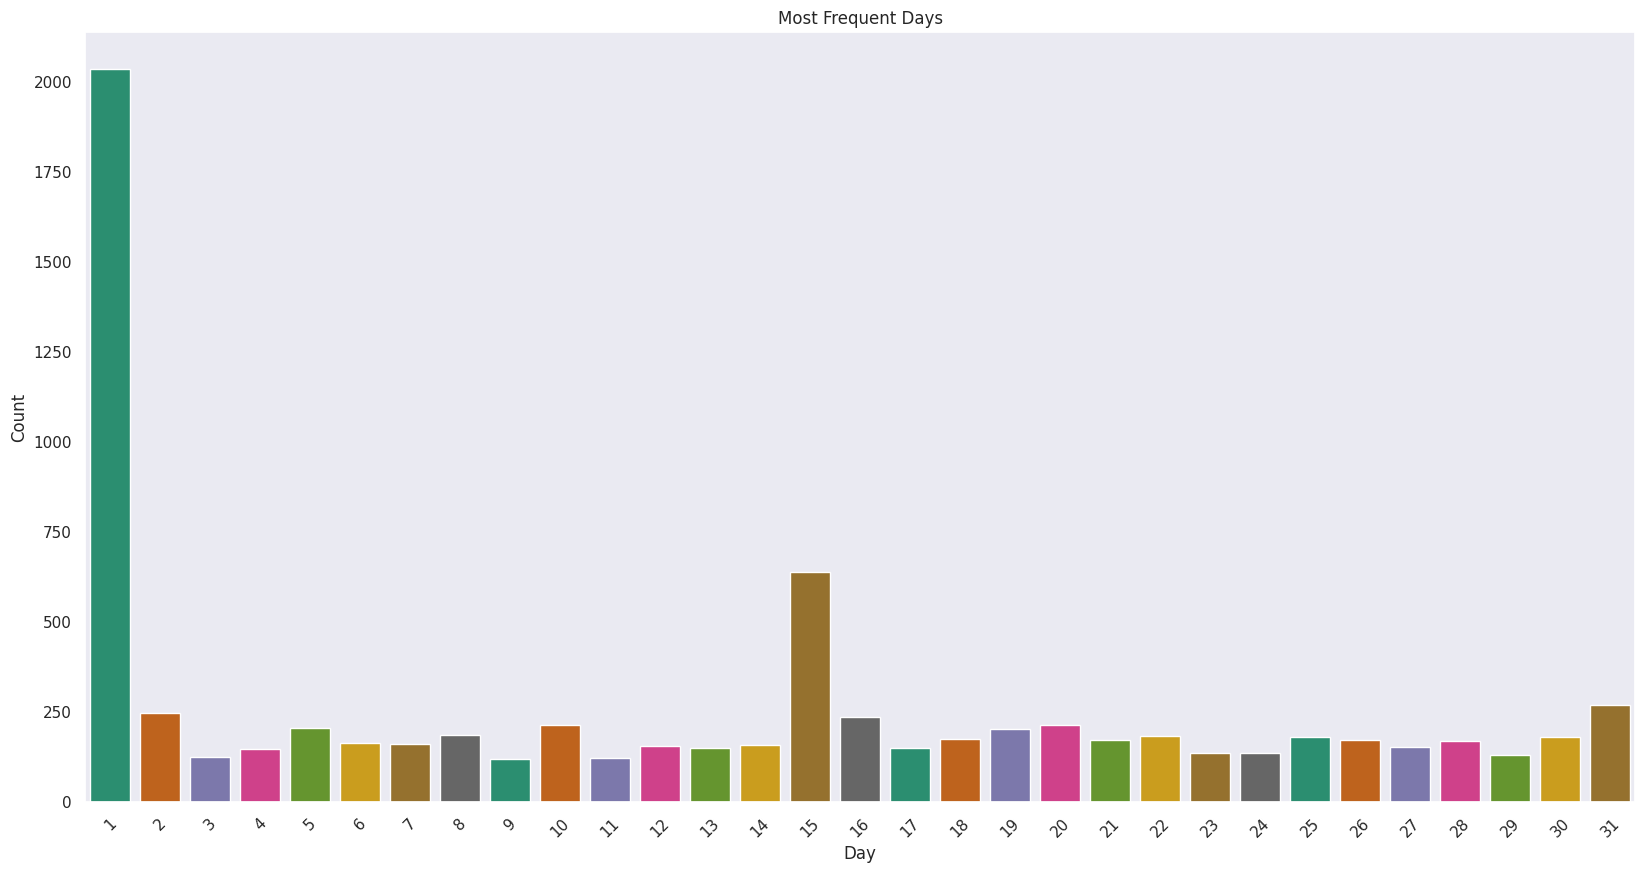

In [ ]:
# Chart - 11 visualization code
# Movies added according to days

day_counts = df_netflix_filtered['day'].value_counts()

day_counts


# Graph
plt.figure(figsize=(20, 10))
sns.barplot(x=day_counts.index, y=day_counts.values, palette='Dark2')
plt.title('Most Frequent Days')
plt.xlabel('Day')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

I picked the bar plot for this representation because it effectively showcases the frequency of movies added on each day of the week. The bar plot allows for easy comparison of the number of movie additions on different days, providing a clear view of the most and least active days in terms of content updates.



##### 2. What is/are the insight(s) found from the chart?

The insights from the chart reveal the most frequent days for movie additions on Netflix. By examining the bar plot, we can identify which days experience the highest number of movie additions, indicating periods of higher content acquisition or release activity. This information can be valuable for Netflix in planning its content schedule and making data-driven decisions on when to add and promote new movie titles. For example, if certain days consistently show higher content additions, Netflix can strategically schedule new movie releases on those days to attract more viewers and potentially increase engagement. Additionally, understanding the days with lower movie additions may help Netflix allocate resources effectively, ensuring a steady flow of new content and minimizing periods of content drought.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact for Netflix. By identifying the most frequent days for movie additions, Netflix can optimize its content strategy to align with viewers' content consumption patterns. This strategic scheduling of content releases can enhance user engagement and potentially lead to increased viewership and retention. Moreover, the data can assist Netflix in planning marketing and promotional efforts around new movie releases, leveraging the higher activity on specific days to maximize audience reach. However, there are no immediate insights from the chart that suggest negative growth. To maintain positive growth, Netflix should continue to diversify its content offerings, ensuring a well-rounded library with a mix of genres and content types to cater to the diverse preferences of its global audience. Additionally, consistent content updates and strategic scheduling can contribute to a positive business impact, fostering user satisfaction and continued growth in the competitive streaming market.

#### Chart - 12

In [ ]:
# Chart - 12 visualization code



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

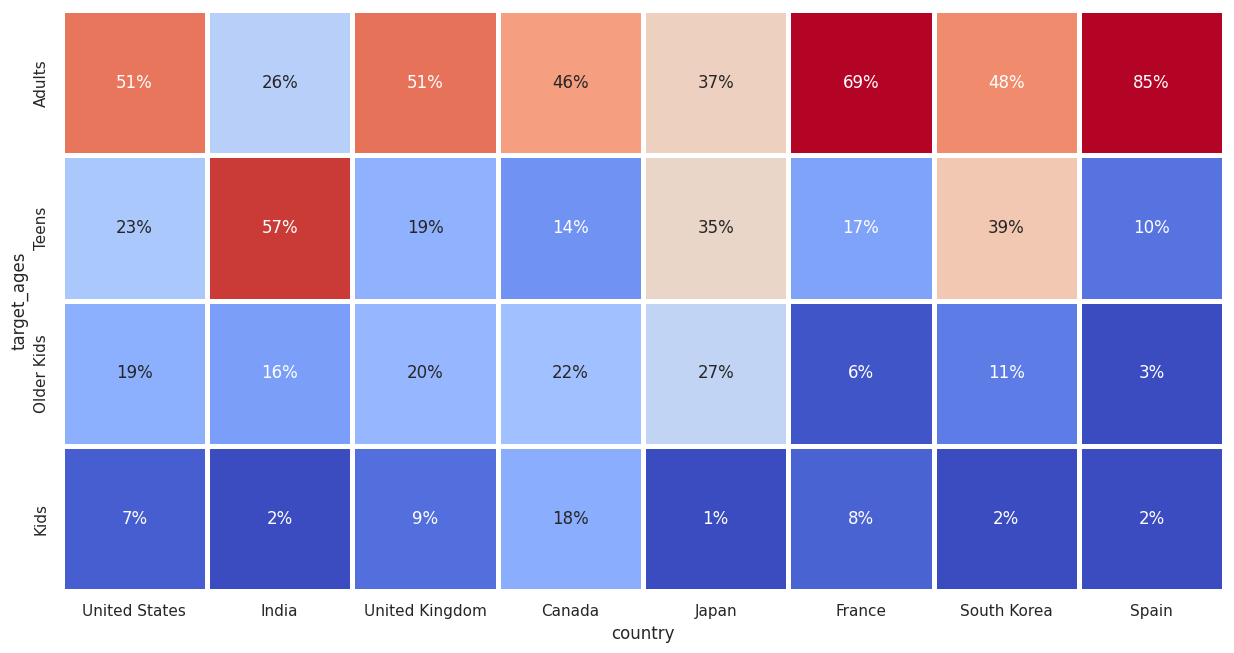

In [ ]:
# Correlation Heatmap visualization code
# Preparing data for heatmap
df_netflix_filtered['count'] = 1
data = df_netflix_filtered.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']

heatmap = df_netflix_filtered.loc[df_netflix_filtered['country'].isin(data)]
heatmap = pd.crosstab(heatmap['country'],heatmap['target_ages'],normalize = "index").T
heatmap

fig, ax = plt.subplots(1, 1, figsize=(15, 15))

countries = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain']

ages = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(heatmap.loc[ages,countries],cmap="coolwarm",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart chosen in this code is a heatmap. Heatmaps are useful for visualizing the relationship between two categorical variables by using color intensity to represent the magnitude of a third numerical variable. In this case, the heatmap is used to show the distribution of target age groups (Adults, Teens, Older Kids, and Kids) across selected countries (United States, India, United Kingdom, Canada, Japan, France, South Korea, and Spain) based on the Netflix data.

##### 2. What is/are the insight(s) found from the chart?

The heatmap provides insights into the distribution of target age groups for Netflix content across specific countries. From the visualization, it becomes apparent that there are notable differences in the content preferences of different countries. The United States seems to have a larger focus on content for adults, while India and South Korea appear to prioritize content for kids. Meanwhile, the United Kingdom, Canada, Japan, France, and Spain show a relatively balanced distribution across age groups. This suggests that Netflix tailors its content offerings based on regional preferences and target demographics. The visualization also allows for easy comparison of the proportions between countries and age groups, helping content creators and strategists make informed decisions on content acquisition and production to meet the diverse preferences of their audience in different regions.

#### Chart - 15 - Hist Plot

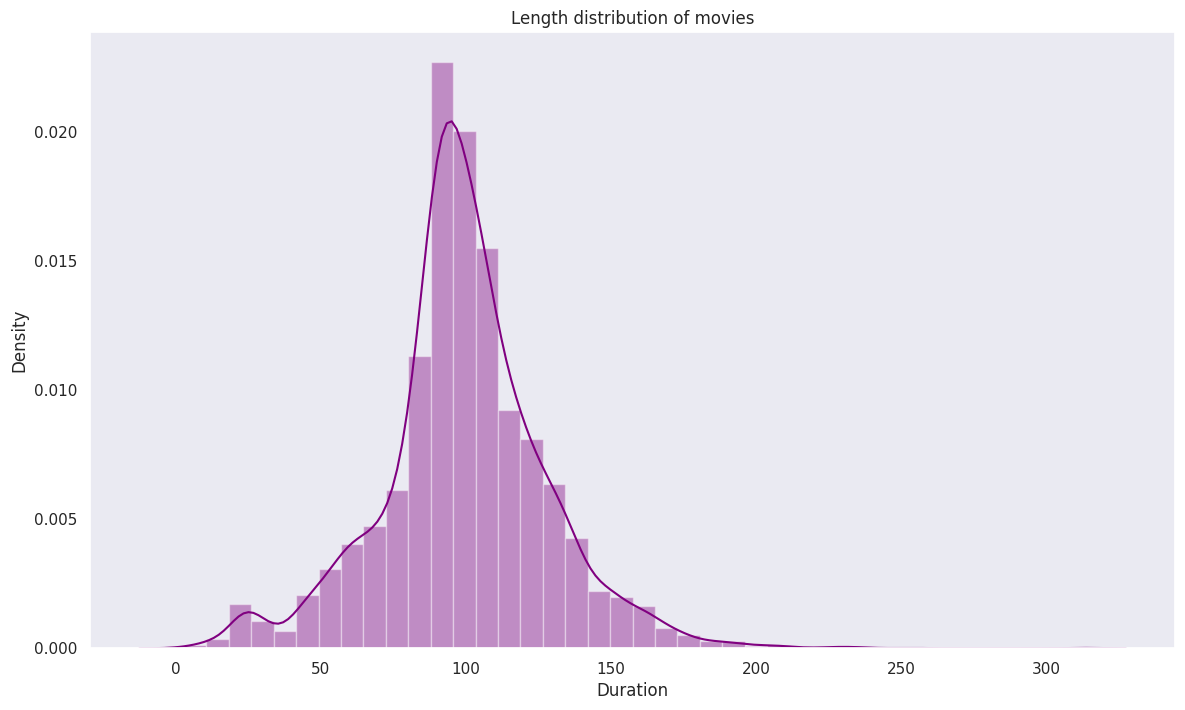

In [ ]:
# Pair Plot visualization code
movies_data = df_netflix[df_netflix['type'] == 'Movie']
movies_data['duration'] = movies_data['duration'].str.extract('(\d+)', expand=False).astype(float)

plt.figure(figsize=(14, 8))
sns.distplot(movies_data['duration'], bins=40, color='purple')
plt.title('Length distribution of movies')
plt.xlabel('Duration')
plt.ylabel('Density')
plt.show()


##### 1. Why did you pick the specific chart?

The specific chart chosen in this code is a histogram (created using Seaborn's distplot). A histogram is a suitable choice for visualizing the distribution of a continuous numerical variable (in this case, movie durations). It helps to understand the spread and concentration of movie lengths in the dataset, making it easy to identify common durations and potential outliers.

##### 2. What is/are the insight(s) found from the chart?

The insight gained from the chart is the distribution pattern of movie durations in the Netflix dataset. The histogram shows how many movies fall within specific duration ranges, providing a clear picture of the most common movie lengths. For instance, it indicates whether the majority of movies are short, medium, or long. Additionally, the histogram can reveal any significant outliers or unusual durations that might be present in the dataset. Content creators and platform administrators can use this information to make decisions about content curation and understand the preferred length of movies among Netflix viewers.






## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis**: There is no significant difference in the number of TV Shows added in different months.

**Alternate Hypothesis**: There is a significant difference in the number of TV Shows added in different months.

In [ ]:
df_netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Create a contingency table for TV Shows and Months
contingency_table = pd.crosstab(df_netflix_filtered["type"], df_netflix_filtered["month"])

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)


alpha = 0.05
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")


Chi-square statistic: 16.41235089323231
p-value: 0.12649965631170976
Fail to reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: The average duration of TV shows added in the year 2018 on Netflix is not significantly different from the average duration of TV shows added in the year 2019.

Alternative Hypothesis: The average duration of TV shows added in the year 2018 on Netflix is significantly different from the average duration of TV shows added in the year 2019.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Filter TV shows for the year 2018 and 2019
tv_shows_2018 = df_netflix_filtered[(df_netflix_filtered["type"] == "TV Show") & (df_netflix_filtered["release_year"] == 2018)].copy()
tv_shows_2019 = df_netflix_filtered[(df_netflix_filtered["type"] == "TV Show") & (df_netflix_filtered["release_year"] == 2019)].copy()

# Convert duration to numeric values
tv_shows_2018["duration"] = pd.to_numeric(tv_shows_2018["duration"].str.extract('(\d+)')[0], errors="coerce")
tv_shows_2019["duration"] = pd.to_numeric(tv_shows_2019["duration"].str.extract('(\d+)')[0], errors="coerce")

tv_shows_2018 = tv_shows_2018.dropna()
tv_shows_2019 = tv_shows_2019.dropna()

# Perform the two-sample t-test
t_stat, p_value = ttest_ind(tv_shows_2018["duration"], tv_shows_2019["duration"], equal_var=False)
alpha = 0.05

print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")


t-statistic: -3.0041372572235443
p-value: 0.006328551377009474
Reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis**: The average duration of TV Shows released in the first 6 months is the same as those released in the last 6 months.

**Alternate Hypothesis**: The average duration of TV Shows released in the first 6 months is different from those released in the last 6 months.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Filter TV Shows for the first 6 months and last 6 months
tv_shows_first_6_months = df_netflix_filtered[(df_netflix_filtered["type"] == "TV Show") & (df_netflix_filtered["release_year"] == 2020) & (df_netflix_filtered["month"].isin(["January", "February", "March", "April", "May", "June"]))].copy()
tv_shows_last_6_months = df_netflix_filtered[(df_netflix_filtered["type"] == "TV Show") & (df_netflix_filtered["release_year"] == 2020) & (df_netflix_filtered["month"].isin(["July", "August", "September", "October", "November", "December"]))].copy()

# Convert duration to numeric values
tv_shows_first_6_months["duration"] = pd.to_numeric(tv_shows_first_6_months["duration"].str.extract('(\d+)')[0], errors="coerce")
tv_shows_last_6_months["duration"] = pd.to_numeric(tv_shows_last_6_months["duration"].str.extract('(\d+)')[0], errors="coerce")

# Remove NaN values
tv_shows_first_6_months = tv_shows_first_6_months.dropna()
tv_shows_last_6_months = tv_shows_last_6_months.dropna()

# Perform the two-sample t-test
t_stat, p_value = ttest_ind(tv_shows_first_6_months["duration"], tv_shows_last_6_months["duration"], equal_var=False)
alpha = 0.05

print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")


t-statistic: -0.9716094265866685
p-value: 0.3428750434433352
Fail to reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
missing_df = df_netflix_filtered.copy()

def missing_value_check(df):
  number_missing = missing_df.isnull().sum()
  missing_value_df = pd.DataFrame({'column_name' : missing_df.columns,
                                  'number_missing': number_missing})
  return missing_value_df.sort_values('number_missing', ascending = False)
missing_value_check(missing_df)

# Checking again
missing_value_check(missing_df)

,column_name,number_missing
director,director,2296
cast,cast,710
country,country,503
ratings_type,ratings_type,7
target_ages,target_ages,7
rating,rating,7
show_id,show_id,0
description,description,0
day,day,0
year_added,year_added,0


In [ ]:
missing_df[['director','country']] = missing_df[['director','country']].fillna('Unknown')
missing_df['cast'] = missing_df['cast'].fillna('No Cast')
missing_df['rating'] = missing_df['rating'].fillna(missing_df['rating'].mode()[0])
missing_df.dropna(axis=0, inplace = True)
missing_df.shape

(7682, 18)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

<Axes: >

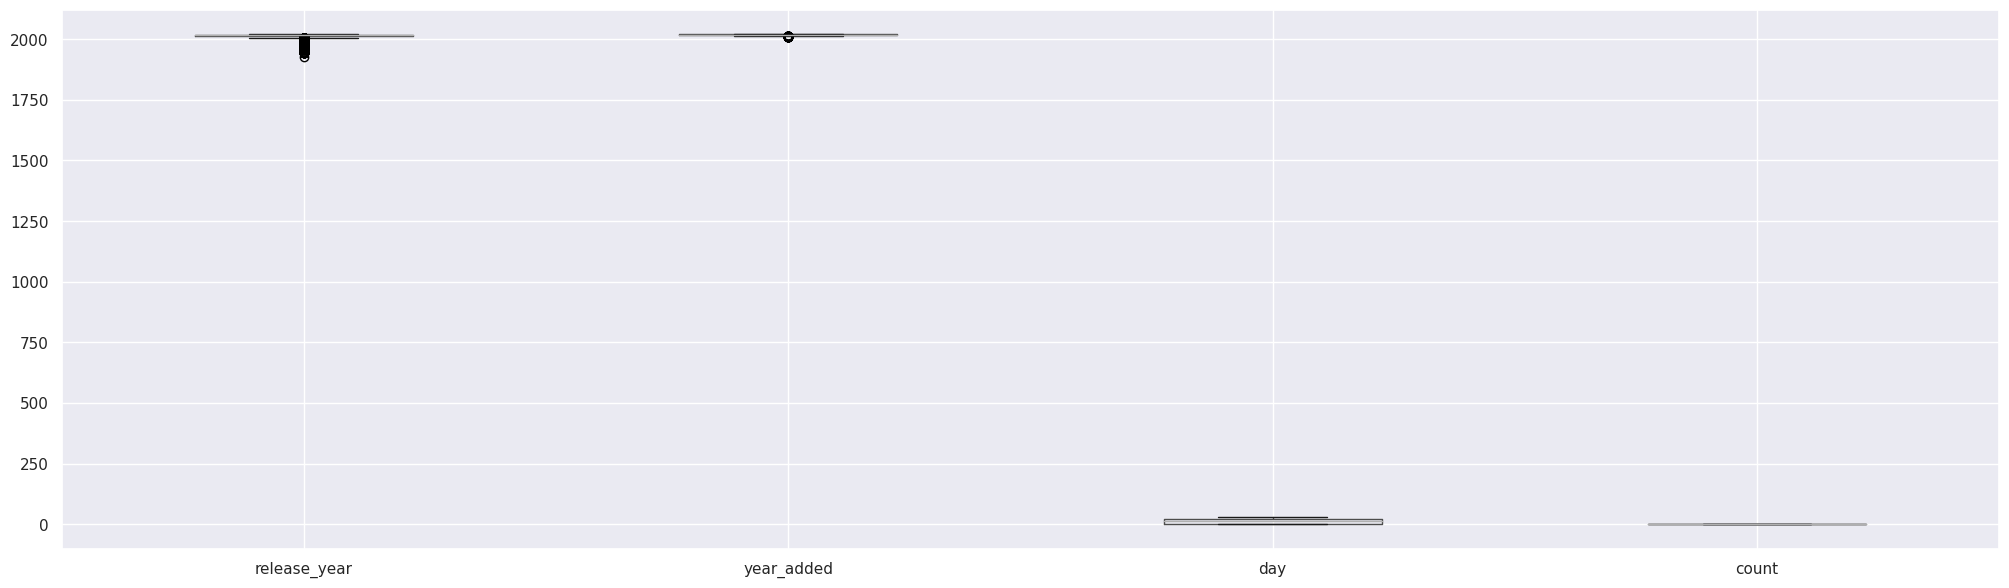

In [ ]:
# Handling Outliers & Outlier treatments
outlier_df= missing_df.copy()

outlier_df.boxplot(figsize=(25,7))    # As you can see we dont have outliers in the dataset.

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
numerical_df= missing_df.select_dtypes(include='number')
non_numerical_df= missing_df.select_dtypes(exclude='number')
non_numerical_df.head(2)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description,month,target_ages,ratings_type
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,Adults,Adults
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,Adults,Adults


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
df_tdp = missing_df.copy() # df_tdp stands for datafram for textual data preprocessing

# Expand Contraction

df_tdp = missing_df[['title']]
df_tdp['all_data'] = missing_df['description'] + ' ' + missing_df['listed_in'] + ' ' + missing_df['cast'] + ' ' + missing_df['director'] + ' ' + missing_df['rating']
df_tdp.set_index('title', inplace=True)
df_tdp.head(5)


,all_data
title,
3%,In a future where the elite inhabit an island ...
7:19,After a devastating earthquake hits Mexico Cit...
23:59,"When an army recruit is found dead, his fellow..."
9,"In a postapocalyptic world, rag-doll robots hi..."
21,A brilliant group of students become card-coun...


#### 2. Lower Casing

In [ ]:
# Lower Casing
df_tdp['all_data'] = df_tdp['all_data'].str.lower()
df_tdp['all_data']
df_tdp

,all_data
title,
3%,in a future where the elite inhabit an island ...
7:19,after a devastating earthquake hits mexico cit...
23:59,"when an army recruit is found dead, his fellow..."
9,"in a postapocalyptic world, rag-doll robots hi..."
21,a brilliant group of students become card-coun...
...,...
Zozo,when lebanon's civil war deprives zozo of his ...
Zubaan,a scrappy but poor boy worms his way into a ty...
Zulu Man in Japan,"in this documentary, south african rapper nast..."


#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
def remove_punctuation(text):
    cleaned_text = text.replace(string.punctuation, '')
    return cleaned_text

df_tdp['all_data'] = df_tdp['all_data'].apply(remove_punctuation)
df_tdp.head(5)


,all_data
title,
3%,in a future where the elite inhabit an island ...
7:19,after a devastating earthquake hits mexico cit...
23:59,"when an army recruit is found dead, his fellow..."
9,"in a postapocalyptic world, rag-doll robots hi..."
21,a brilliant group of students become card-coun...


#### 4. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
# Download the stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    cleaned_text = ' '.join(word for word in text.split() if word.lower() not in stop_words)
    return cleaned_text

# Apply remove_stopwords function to 'cluster_data' column
df_tdp['all_data'] = df_tdp['all_data'].apply(remove_stopwords)

# Display the updated DataFrame
df_tdp.head(5)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,all_data
title,
3%,future elite inhabit island paradise far crowd...
7:19,"devastating earthquake hits mexico city, trapp..."
23:59,"army recruit found dead, fellow soldiers force..."
9,"postapocalyptic world, rag-doll robots hide fe..."
21,brilliant group students become card-counting ...


#### 5. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

stemmer = SnowballStemmer("english")

def stem(text):
  text=[stemmer.stem(word)for word in text.split()]
  return " ".join(text)

df_tdp['all_data']=df_tdp['all_data'].apply(stem)
df_tdp.head(5)

,all_data
title,
3%,futur elit inhabit island paradis far crowd sl...
7:19,"devast earthquak hit mexico city, trap survivo..."
23:59,"armi recruit found dead, fellow soldier forc c..."
9,"postapocalypt world, rag-dol robot hide fear d..."
21,brilliant group student becom card-count exper...


In [ ]:
bag_of_words=df_tdp['all_data']
bag_of_words

title
3%                                         futur elit inhabit island paradis far crowd sl...
7:19                                       devast earthquak hit mexico city, trap survivo...
23:59                                      armi recruit found dead, fellow soldier forc c...
9                                          postapocalypt world, rag-dol robot hide fear d...
21                                         brilliant group student becom card-count exper...
                                                                 ...                        
Zozo                                       lebanon civil war depriv zozo family, he left ...
Zubaan                                     scrappi poor boy worm way tycoon dysfunct fami...
Zulu Man in Japan                          documentary, south african rapper nasti c hit ...
Zumbo's Just Desserts                      dessert wizard adriano zumbo look next “willi ...
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS    documentari delv myst

##### Which text normalization technique have you used and why?

Answer Here.

#### 6. Text Vectorization

In [ ]:
# Vectorizing Text
tfidf = TfidfVectorizer(max_features = 20000)
X = tfidf.fit_transform(bag_of_words)

X.shape

(7682, 20000)

In [ ]:
X = X.toarray()
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.17282332, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

##### Which text vectorization technique have you used and why?

Answer Here.

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

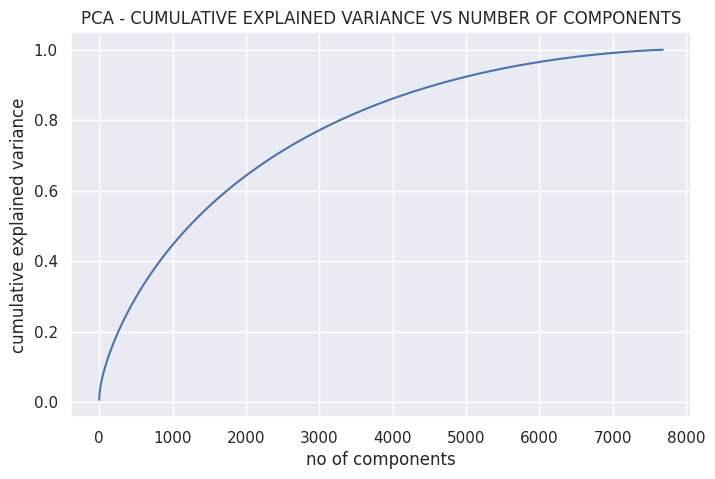

In [ ]:
# Dimensionality Reduction

pca = PCA(random_state=50)
pca.fit(X)


#plot
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - CUMULATIVE EXPLAINED VARIANCE VS NUMBER OF COMPONENTS')
plt.xlabel('no of components')
plt.ylabel('cumulative explained variance')
plt.grid(True)
plt.show()


In [ ]:
pca = PCA(n_components=3000,random_state=50)
pca.fit(X)

PCA(n_components=3000, random_state=50)

In [ ]:
x_pca = pca.transform(X)
x_pca.shape

(7682, 3000)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 - K Means

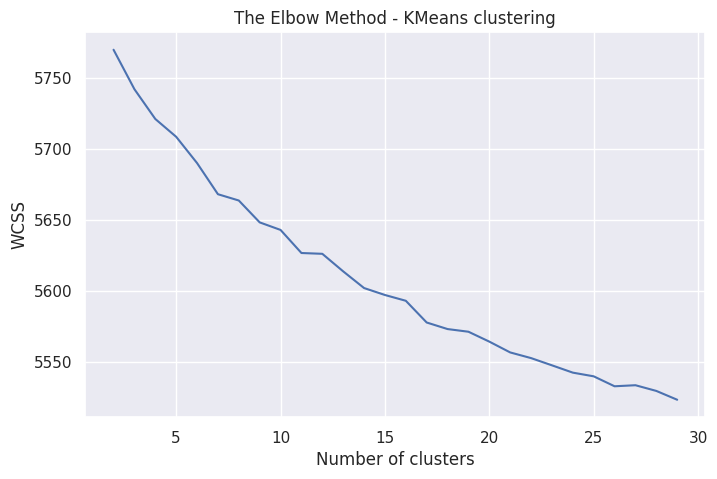

In [ ]:
# ML Model - 1 Implementation

wcss=[]
k_range = range(2, 30)
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(x_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)

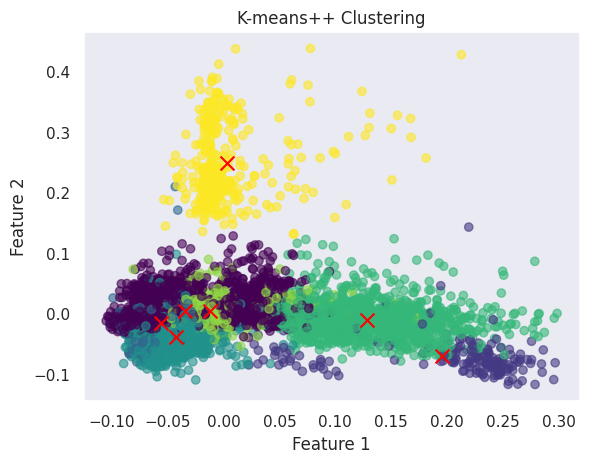

In [ ]:
num_cluster=7
kmeans = KMeans(n_clusters=num_cluster, init='k-means++', random_state=42)
kmeans.fit(x_pca)
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_


# Plot

plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=100, c='red')
plt.title('K-means++ Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

#### 1. Silhouette Score

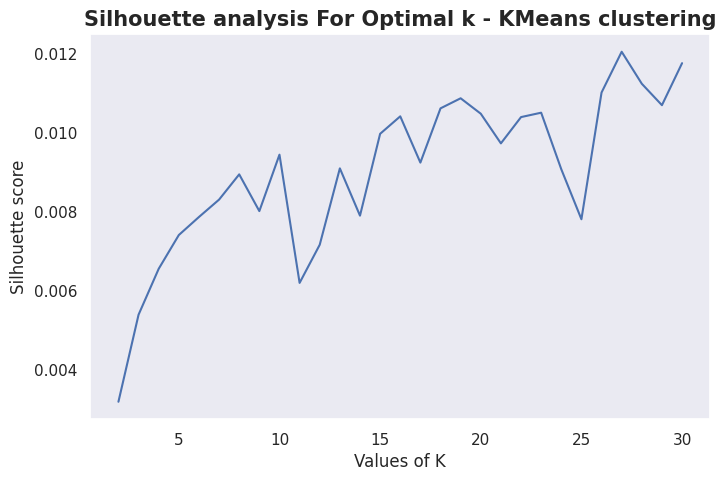

In [ ]:
# Silhouette Score

range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))
#plot
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering',fontsize=15, fontweight='bold')
plt.show()

### ML Model - 2 - Hierarchical clustering

In [ ]:
# ML Model - 2 Implementation

hierarchical_clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
cluster_labels = hierarchical_clustering.fit_predict(x_pca)
print(cluster_labels)

[4238 6329 4023 ...    5    2    0]


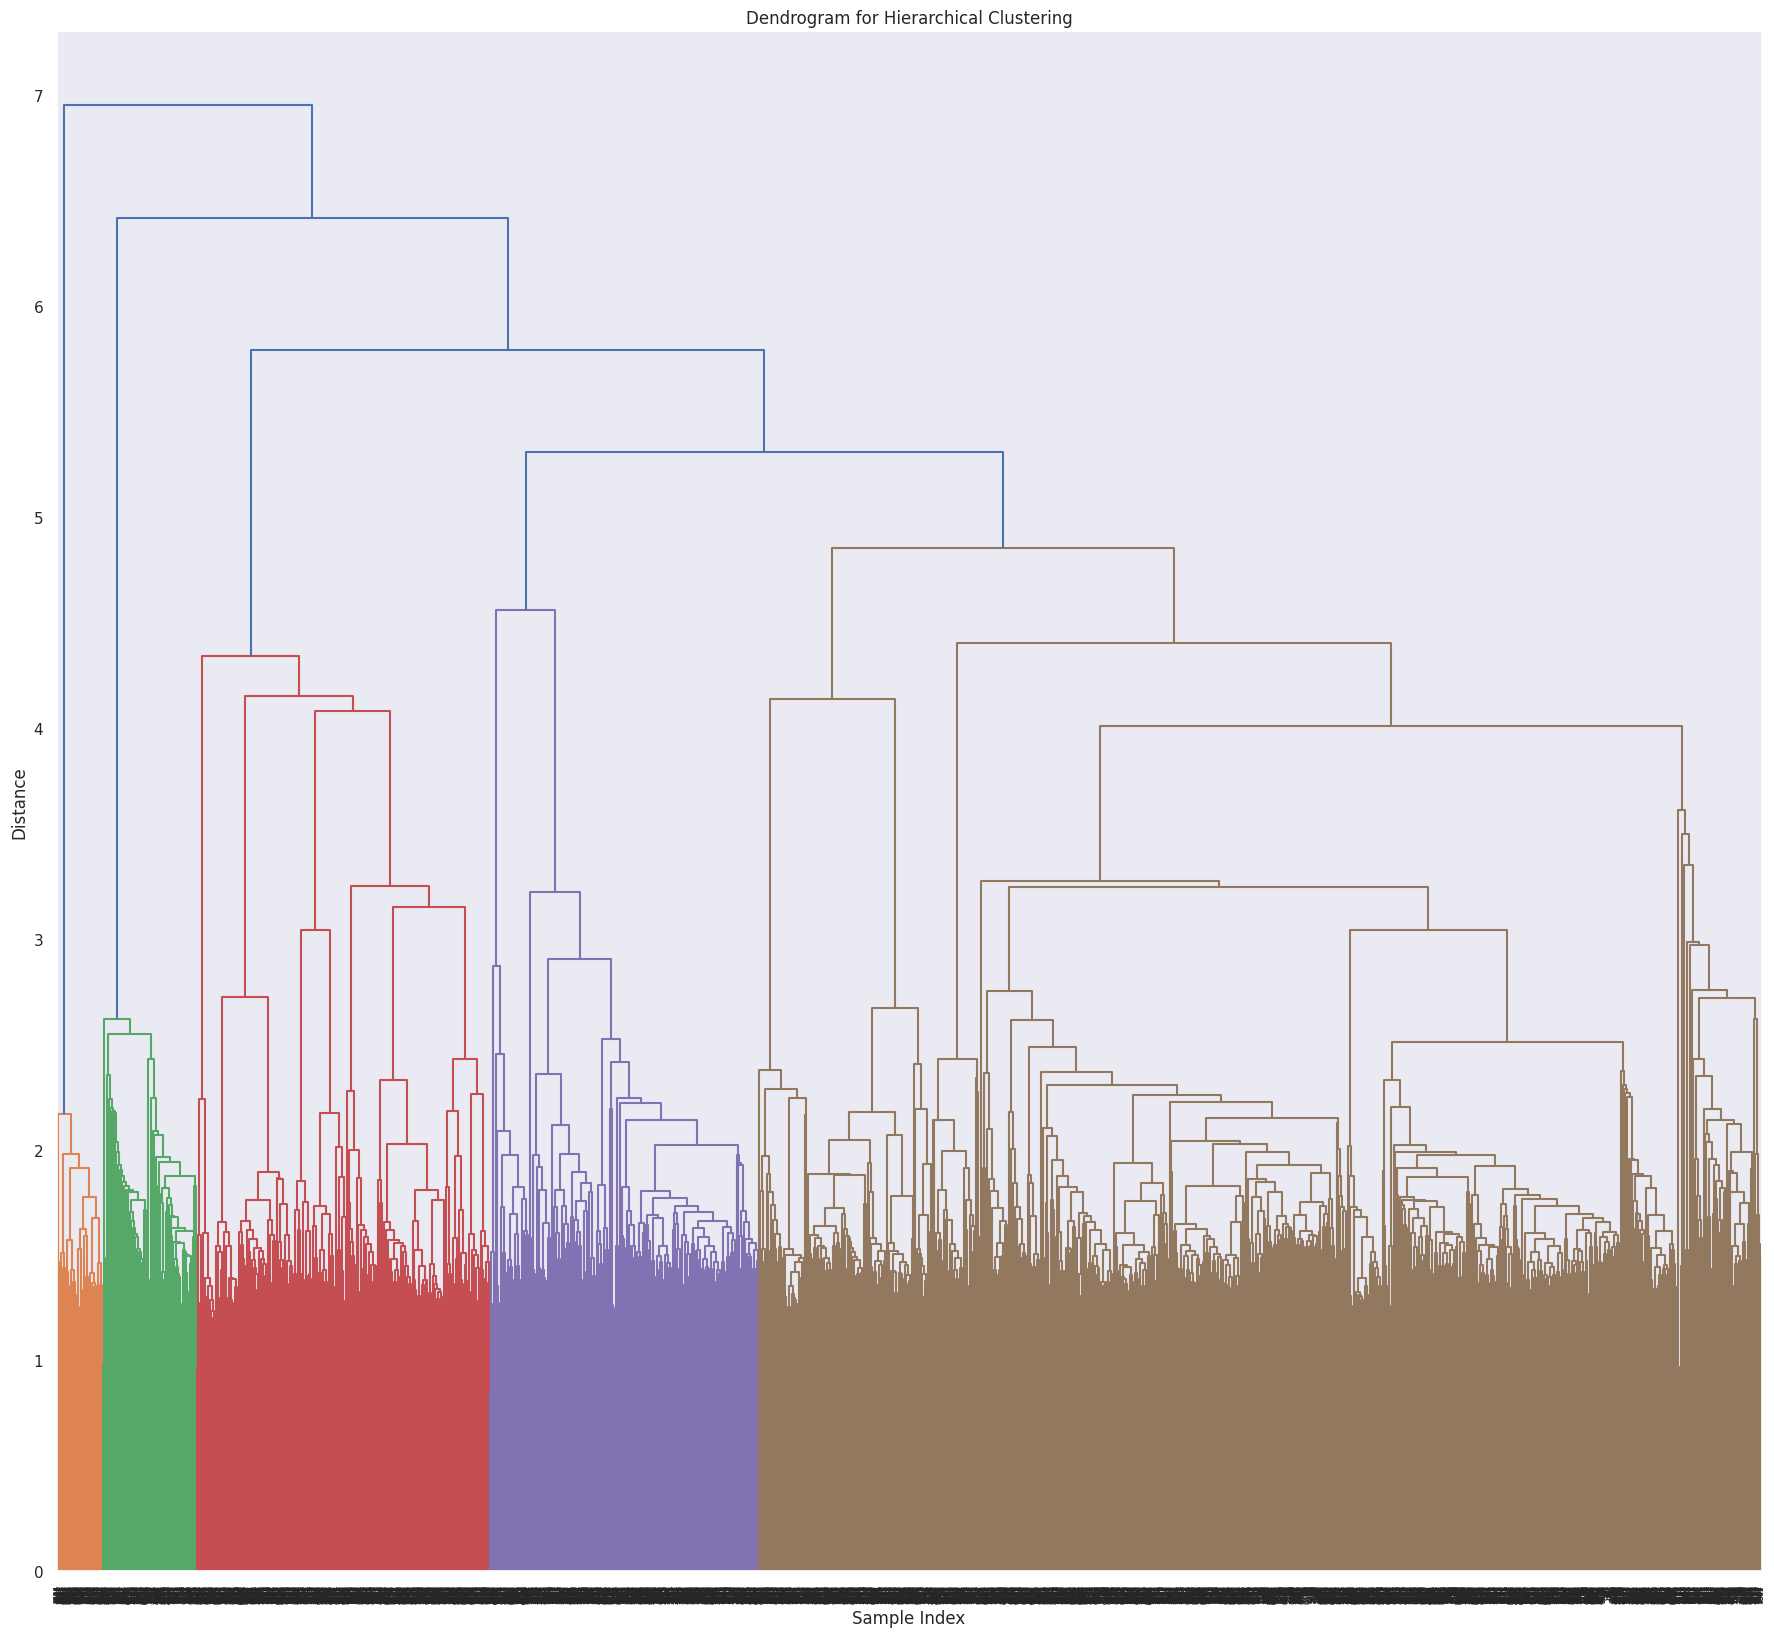

In [ ]:

linkage_matrix = linkage(x_pca, method='ward')
plt.figure(figsize=(22, 20))
dendrogram(linkage_matrix, truncate_mode='level', p=num_clusters)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

### ML Model - 3 DB SCAN

Number of clusters: 5


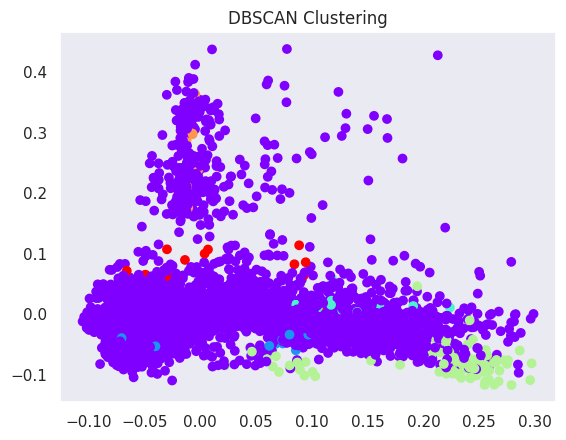

In [ ]:
# ML Model - 3 Implementation

db = DBSCAN(eps=1, min_samples=15)
cluster_labels = db.fit_predict(x_pca)

# Ignore Noise if there any
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print(f"Number of clusters: {num_clusters}")

# Plot
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=cluster_labels, cmap='rainbow')

plt.title('DBSCAN Clustering')
plt.show()


## ***8.*** ***Recommender system***

In [ ]:
# Recommender system

content_df = pd.DataFrame(df_netflix_filtered)

# TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(content_df['description'])

# cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# recommend function
def recommend(title, cosine_similarity=cosine_sim, df=content_df):
    index = df.index[df['title'] == title].tolist()[0]
    simalarity = list(enumerate(cosine_similarity[index]))
    simalarity = sorted(simalarity, key=lambda x: x[1], reverse=True)[1:11]
    movie = [i[0] for i in simalarity]
    reccomended_movies = df['title'].iloc[movie].values
    simalarity = [round(i[1], 4) for i in simalarity]
    rec_table = pd.DataFrame({'Recommend programme': reccomended_movies, 'Similarity(0-1)': simalarity})
    return rec_table

# recommendations
movie_title = '3 Idiots'

def get_recommendations(movie_title):
    if movie_title in content_df['title'].values:
        recommendations = recommend(movie_title)
        return recommendations
    else:
        return pd.DataFrame(columns=['Recommend programme', 'Similarity(0-1)'])

recommendations_df = get_recommendations(movie_title)
recommendations_df


,Recommend programme,Similarity(0-1)
0,College Romance,0.2321
1,Engineering Girls,0.1727
2,Candy Jar,0.1526
3,100 Things to do Before High School,0.1482
4,Pahuna,0.1469
5,Best Neighbors,0.1464
6,Be with Me,0.1359
7,Moms at War,0.1351
8,Lovesong,0.1299
9,Limitless,0.1273


# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***